# Trying to figure out how to compare models, not super interesting.  
## See: Content Models.ipynb, Explicit Similarity Models.ipynb, Implicit Similarity Models.ipynb

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# if you don't already have it
# !pip install turicreate
import pandas as pd
import numpy as np
import turicreate as tc
from turicreate.toolkits.recommender.util import precision_recall_by_user
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [4]:
from tqdm.notebook import tqdm

In [6]:
# docs: https://apple.github.io/turicreate/docs/userguide/recommender/

In [7]:
# data
raw_actions = tc.SFrame.read_csv('../data/raw_data/ratings.csv', verbose=False)
raw_tags = tc.SFrame.read_csv('../data/raw_data/tags.csv', verbose=False)
raw_books_with_tags = tc.SFrame.read_csv('../data/raw_data/book_tags.csv', verbose=False)
books = tc.SFrame.read_csv('../data/parsed_data/ultimate_books.csv', verbose=False)
to_read = tc.SFrame.read_csv('../data/raw_data/to_read.csv', verbose=False)
books_with_tags = tc.SFrame.read_csv('../data/parsed_data/books_with_tags.csv', verbose=False)
clustered_books_with_tags = tc.SFrame.read_csv('../data/parsed_data/clustered_books_with_tags.csv', verbose=False)
genre_tags = tc.SFrame.read_csv('../data/parsed_data/genre_tag_clusters.csv', verbose=False)

In [20]:
len(raw_actions.join(books, on={'book_id':'goodreads_book_id'}))

672142

In [21]:
len(raw_actions.join(books))

5579146

In [8]:
bt = books[['book_id','goodreads_book_id']].join(raw_books_with_tags).join(raw_tags)

In [66]:
backup_book_array = book_array

In [70]:
book_genre_cluster_list = []
#unique_books = bt['goodreads_book_id'].unique()
for book_index in tqdm(range(0, len(books['goodreads_book_id']))):
    book_id = books['goodreads_book_id'][book_index]
    book_tag_array = []
    tags = bt[bt['goodreads_book_id'] == book_id]['tag_name']
    for t in range(0, len(genre_tags)):
        genre_cluster_tags = list(map(lambda x: x.strip("'"), genre_tags[t]['Cluster'].strip('[]').split(' ')))
        found_tag = bool(set(tags) & set(genre_cluster_tags))
        book_tag_array.append(1 if found_tag else 0)
    book_genre_cluster_list.append(book_tag_array)

In [71]:
data = np.array(book_genre_cluster_list).T
d = list(map(tc.SArray,data))
book_genre_clusters=tc.SFrame(d)

In [216]:
book_genre_clusters_df = pd.DataFrame(book_genre_cluster_list)

In [218]:
book_genre_clusters_df.to_csv('../data/parsed_data/books_with_genre_clusters.csv')

In [73]:
book_genre_clusters['book_id'] = books['book_id']

In [74]:
book_genre_clusters.head()

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0
0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0
0,0,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0
0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0
0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0


In [75]:
# remove actions from filtered books
actions = raw_actions.join(books)[['user_id','book_id','rating']]

In [76]:
# train and test data for explicit models
high_rated_data = actions[actions["rating"] >= 4]
low_rated_data = actions[actions["rating"] < 4]
train_data_1, test_data = tc.recommender.util.random_split_by_user(
                                    high_rated_data, user_id='user_id', item_id='book_id')
train_data = train_data_1.append(low_rated_data)

In [77]:
# train and test data for implicit models
to_read_train, to_read_test = tc.recommender.util.random_split_by_user(to_read, user_id='user_id', item_id='book_id')

In [156]:
rmse_x = []#,'similarity','similarity_clustered_books','tags_cv_svd','tags_tfid_svd','genre_clusters']
rmse_y = []
precision_y = [[], [], [], []] # cutoffs: 1, 3, 5, 10
cutoffs = [0,2,4,9]
precision_x = [1, 3, 5, 10]
precision_xy = []

# Popularity (Baseline)

In [157]:
popularity_model = tc.recommender.popularity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', verbose=False)
popularity_eval = popularity_model.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('popularity')
rmse_y.append(popularity_eval['rmse_overall'])

In [169]:
for i in range(0, 4):
    precision_y[i].append(popularity_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [182]:
precision_xy.append([popularity_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

[[0.005005005005005005,
  0.002335669002335669,
  0.002002002002002002,
  0.0014014014014014013]]

In [167]:
popularity_eval['precision_recall_overall']

cutoff,precision,recall
1,0.005005005005005005,0.00030415754553685586
2,0.002502502502502502,0.00030415754553685576
3,0.002335669002335669,0.0004538799174814499
4,0.0020020020020020033,0.0005651022509260055
5,0.002002002002002002,0.0006661648519886068
6,0.0018351685018351688,0.0007217760187108848
7,0.0018590018590018582,0.0008298386267734923
8,0.001626626626626627,0.0008298386267734927
9,0.0015571126682237795,0.0009013386982735641
10,0.0014014014014014013,0.0009013386982735644


# Explicit Classifiers

## Similarity

In [158]:
item_similarity_model = tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', verbose=False)
item_similarity_eval = item_similarity_model.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('similarity')
rmse_y.append(item_similarity_eval['rmse_overall'])

In [171]:
for i in range(0, 4):
    precision_y[i].append(item_similarity_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [184]:
precision_xy.append([item_similarity_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [159]:
item_similarity_model_cluster = tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=clustered_books_with_tags[['book_id','cluster']], verbose=False)
item_similarity_cluster_eval = item_similarity_model_cluster.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('similarity_clustered_books')
rmse_y.append(item_similarity_cluster_eval['rmse_overall'])

In [172]:
for i in range(0, 4):
    precision_y[i].append(item_similarity_cluster_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [185]:
precision_xy.append([item_similarity_cluster_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [126]:
cv = CountVectorizer()
cv.fit(books_with_tags['tag_name'])
cv_svd = TruncatedSVD(n_components=100)
X = cv_svd.fit_transform(cv.transform(books_with_tags['tag_name']))
cv_svd.explained_variance_ratio_.sum()

0.8064529688379471

In [127]:
cv_svd = TruncatedSVD(n_components=35)
X = cv_svd.fit_transform(cv.transform(books_with_tags['tag_name']))
cv_svd.explained_variance_ratio_.sum()
svd_tags = tc.SFrame(pd.DataFrame(X))

In [128]:
svd_tags = tc.SFrame(pd.DataFrame(X))
svd_tags['book_id'] = books['book_id']

In [160]:
item_similarity_model_svd = tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=svd_tags, verbose=False)
item_similarity_svd_eval = item_similarity_model_svd.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('tags_cv_svd')
rmse_y.append(item_similarity_svd_eval['rmse_overall'])

In [173]:
for i in range(0, 4):
    precision_y[i].append(item_similarity_svd_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [186]:
precision_xy.append([item_similarity_svd_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [130]:
tfid = TfidfVectorizer()
tfid.fit(books_with_tags['tag_name'])
tfid_svd = TruncatedSVD(n_components=100)
X = tfid_svd.fit_transform(tfid.transform(books_with_tags['tag_name']))
tfid_svd.explained_variance_ratio_.sum()

0.5162251473206468

In [131]:
svd_tfid_tags = tc.SFrame(pd.DataFrame(data))
svd_tfid_tags['book_id'] = books['book_id']

In [161]:
item_similarity_model_svd_tfid = tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=svd_tfid_tags, verbose=False)
item_similarity_svd_tfid_eval = item_similarity_model_svd_tfid.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('tags_tfid_svd')
rmse_y.append(item_similarity_svd_tfid_eval['rmse_overall'])

In [174]:
for i in range(0, 4):
    precision_y[i].append(item_similarity_svd_tfid_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [187]:
precision_xy.append([item_similarity_svd_tfid_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [162]:
item_similarity_model_genre_clusters = tc.recommender.item_similarity_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=book_genre_clusters, verbose=False)
item_similarity_genre_clusters_eval = item_similarity_model_genre_clusters.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('genre_clusters')
rmse_y.append(item_similarity_genre_clusters_eval['rmse_overall'])

In [175]:
for i in range(0, 4):
    precision_y[i].append(item_similarity_genre_clusters_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [188]:
precision_xy.append([item_similarity_genre_clusters_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

<BarContainer object of 6 artists>

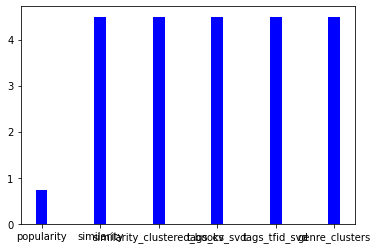

In [134]:
ax = plt.subplot(111)
ax.bar(rmse_x, rmse_y, width=0.2, color='b', align='center')


[Text(0.4, 0, 'popularity'),
 Text(1.4, 0, 'similarity'),
 Text(2.4, 0, 'similarity_clustered_books'),
 Text(3.4, 0, 'tags_cv_svd'),
 Text(4.4, 0, 'tags_tfid_svd'),
 Text(5.4, 0, 'genre_clusters')]

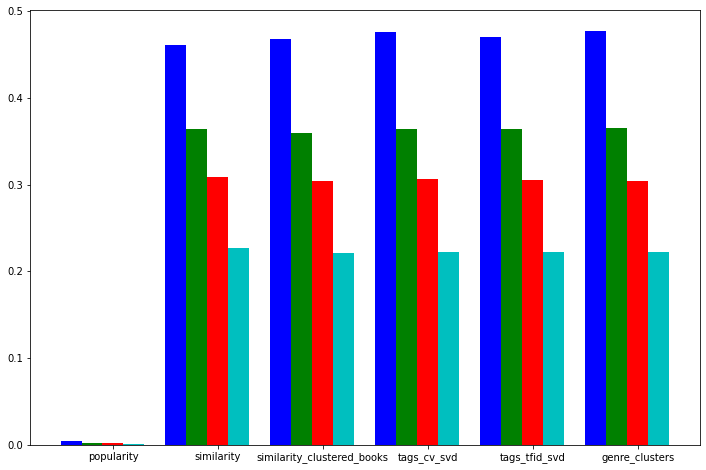

In [178]:
fig, ax = plt.subplots(figsize=(12, 8))


bar_width = 0.2
x = np.arange(len(rmse_x))

ax.bar(x, precision_y[0], width=bar_width, color='b', align='center')
ax.bar(x+bar_width, precision_y[1], width=bar_width, color='g', align='center')
ax.bar(x+bar_width*2, precision_y[2], width=bar_width, color='r', align='center')
ax.bar(x+bar_width*3, precision_y[3], width=bar_width, color='c', align='center')

ax.set_xticks(x + bar_width*2)
ax.set_xticklabels(rmse_x)


[Text(0.4, 0, '1'), Text(1.4, 0, '3'), Text(2.4, 0, '5'), Text(3.4, 0, '9')]

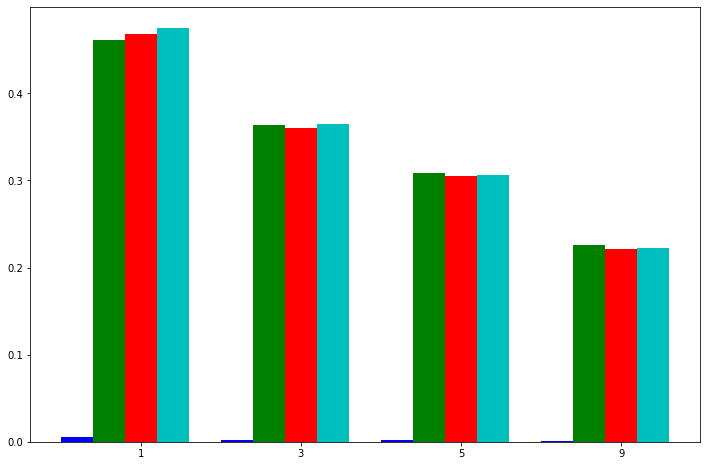

In [193]:
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
x = np.arange(len(precision_x))

ax.bar(x, precision_xy[0], width=bar_width, color='b', align='center')
ax.bar(x+bar_width, precision_xy[1], width=bar_width, color='g', align='center')
ax.bar(x+bar_width*2, precision_xy[2], width=bar_width, color='r', align='center')
ax.bar(x+bar_width*3, precision_xy[3], width=bar_width, color='c', align='center')
ax.bar(x+bar_width*3, precision_xy[4], width=bar_width, color='c', align='center')

ax.set_xticks(x + bar_width*2)
ax.set_xticklabels(precision_x)


## Factorization

In [194]:
rmse_x = []#,'similarity','similarity_clustered_books','tags_cv_svd','tags_tfid_svd','genre_clusters']
rmse_y = []
precision_y = [[], [], [], []] # cutoffs: 1, 3, 5, 10
cutoffs = [0,2,4,9]
precision_x = [1, 3, 5, 10]
precision_xy = []

In [200]:
factorization_model = tc.recommender.factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', verbose=False)
factorization_eval = factorization_model.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('factorization')
rmse_y.append(factorization_eval['rmse_overall'])

In [201]:
for i in range(0, 4):
    precision_y[i].append(factorization_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [202]:
precision_xy.append([factorization_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [203]:
factorization_model_cluster = tc.recommender.factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=clustered_books_with_tags[['book_id','cluster']], verbose=False)
factorization_cluster_eval = factorization_model_cluster.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)
rmse_x.append('factorization_cluster')
rmse_y.append(factorization_cluster_eval['rmse_overall'])

In [204]:
for i in range(0, 4):
    precision_y[i].append(factorization_cluster_eval['precision_recall_overall'][cutoffs[i]]['precision'])

In [205]:
precision_xy.append([factorization_cluster_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [206]:
factorization_model_svd = tc.recommender.factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=svd_tags, verbose=False)
factorization_svd_eval = factorization_model_svd.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)


In [ ]:
rmse_x.append('factorization_svd')
rmse_y.append(factorization_svd_eval['rmse_overall'])
for i in range(0, 4):
    precision_y[i].append(factorization_svd_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([factorization_svd_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [209]:
factorization_model_svd_tfid = tc.recommender.factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=svd_tfid_tags, verbose=False)
factorization_svd_tfid_eval = factorization_model_svd_tfid.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)

SyntaxError: invalid syntax (<ipython-input-209-66c1ee880885>, line 1)

In [ ]:
rmse_x.append('factorization_svd_tfid')
rmse_y.append(factorization_svd_tfid_eval['rmse_overall'])
for i in range(0, 4):
    precision_y[i].append(factorization_svd_tfid_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([factorization_svd_tfid_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [ ]:
factorization_model_genre_clusters = tc.recommender.factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating', item_data=book_genre_clusters, verbose=False)
factorization_genre_clusters_eval = factorization_model_genre_clusters.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)

In [ ]:
rmse_x.append('factorization_genre_clusters')
rmse_y.append(factorization_genre_clusters_eval['rmse_overall'])
for i in range(0, 4):
    precision_y[i].append(factorization_genre_clusters_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([factorization_genre_clusters_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

## Ranking Factorization

In [31]:
ranking_factorization_model = tc.recommender.ranking_factorization_recommender.create(train_data, user_id='user_id', item_id='book_id', target='rating')
ranking_factorization_model.evaluate(test_data, exclude_known_for_precision_recall=True, verbose=False)

Preparing data set.

Data has 5960837 observations with 53424 users and 10000 items.

Data prepared in: 2.40575s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 745104 / 5960837 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 1.26608                                  |

| 5       | 0.0488281         | 1.49131                                  |

| 6       | 0.0244141         | 1.48253                                  |

| 7       | 0.012207          | 1.4954                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 1.26608                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 109us        | 1.928             | 0.991628              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.71s        | DIVERGED          | DIVERGED              | 0.0976562   |

| RESET   | 3.43s        | 1.92798           | 0.991621              |             |

| 1       | 5.28s        | 1.39104           | 0.973946              | 0.0488281   |

| 2       | 7.12s        | 1.24283           | 0.916423              | 0.0290334   |

| 3       | 8.92s        | 1.10593           | 0.85639               | 0.0214205   |

| 4       | 10.64s       | 1.02513           | 0.825057              | 0.0172633   |

| 5       | 12.41s       | 0.976969          | 0.804513              | 0.014603    |

| 9       | 19.23s       | 0.889679          | 0.764639              | 0.00939698  |

| 14      | 27.61s       | 0.846904          | 0.744004              | 0.00674643  |

| 19      | 35.93s       | 0.824902          | 0.732987              | 0.00536543  |

| 24      | 44.83s       | 0.811007          | 0.725946              | 0.0045031   |

| 25      | 46.50s       | 0.808364          | 0.724668              | 0.00436732  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.775356

Final training RMSE: 0.698427

{'precision_recall_by_user': Columns:
 	user_id	int
 	cutoff	int
 	precision	float
 	recall	float
 	count	int
 
 Rows: 18000
 
 Data:
 +---------+--------+--------------------+--------+-------+
 | user_id | cutoff |     precision      | recall | count |
 +---------+--------+--------------------+--------+-------+
 |    2    |   1    |        0.0         |  0.0   |   8   |
 |    2    |   2    |        0.0         |  0.0   |   8   |
 |    2    |   3    |        0.0         |  0.0   |   8   |
 |    2    |   4    |        0.0         |  0.0   |   8   |
 |    2    |   5    |        0.0         |  0.0   |   8   |
 |    2    |   6    |        0.0         |  0.0   |   8   |
 |    2    |   7    |        0.0         |  0.0   |   8   |
 |    2    |   8    |       0.125        | 0.125  |   8   |
 |    2    |   9    | 0.1111111111111111 | 0.125  |   8   |
 |    2    |   10   |        0.1         | 0.125  |   8   |
 +---------+--------+--------------------+--------+-------+
 [18000 rows x 5 columns]


# Implicit Classifiers

## Item Similarity

In [219]:
rmse_x = []#,'similarity','similarity_clustered_books','tags_cv_svd','tags_tfid_svd','genre_clusters']
rmse_y = []
precision_y = [[], [], [], []] # cutoffs: 1, 3, 5, 10
cutoffs = [0,2,4,9]
precision_x = [1, 3, 5, 10]
precision_xy = []

In [220]:
implicit_item_similarity_model = tc.recommender.item_similarity_recommender.create(to_read_train, user_id='user_id', item_id='book_id', verbose=False)
implicit_item_similarity_eval = implicit_item_similarity_model.evaluate(to_read_test, exclude_known_for_precision_recall=True, verbose=False)

In [223]:
rmse_x.append('similarity')
for i in range(0, 4):
    precision_y[i].append(implicit_item_similarity_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([implicit_item_similarity_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [224]:
implicit_item_similarity_model_cluster = tc.recommender.item_similarity_recommender.create(to_read_train, user_id='user_id', item_id='book_id', item_data=clustered_books_with_tags[['book_id','cluster']], verbose=False)
implicit_item_similarity_cluster_eval = implicit_item_similarity_model_cluster.evaluate(to_read_test, exclude_known_for_precision_recall=True, verbose=False)

In [225]:
rmse_x.append('similarity_cluster')
for i in range(0, 4):
    precision_y[i].append(implicit_item_similarity_cluster_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([implicit_item_similarity_cluster_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [226]:
implicit_item_similarity_model_svd = tc.recommender.item_similarity_recommender.create(to_read_train, user_id='user_id', item_id='book_id', item_data=svd_tags, verbose=False)
implicit_item_similarity_svd_eval = implicit_item_similarity_model_svd.evaluate(to_read_test, exclude_known_for_precision_recall=True, verbose=False)

In [227]:
rmse_x.append('similarity_svd')
for i in range(0, 4):
    precision_y[i].append(implicit_item_similarity_svd_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([implicit_item_similarity_svd_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [228]:
implicit_item_similarity_model_svd_tfid = tc.recommender.item_similarity_recommender.create(to_read_train, user_id='user_id', item_id='book_id', item_data=svd_tfid_tags, verbose=False)
implicit_item_similarity_svd_tfid_eval = implicit_item_similarity_model_svd_tfid.evaluate(to_read_test, exclude_known_for_precision_recall=True, verbose=False)

In [229]:
rmse_x.append('similarity_svd_tfid')
for i in range(0, 4):
    precision_y[i].append(implicit_item_similarity_svd_tfid_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([implicit_item_similarity_svd_tfid_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

In [230]:
implicit_item_similarity_model_genre_clusters = tc.recommender.item_similarity_recommender.create(to_read_train, user_id='user_id', item_id='book_id', item_data=book_genre_clusters, verbose=False)
implicit_item_similarity_genre_clusters_eval = implicit_item_similarity_model_genre_clusters.evaluate(to_read_test, exclude_known_for_precision_recall=True, verbose=False)

In [231]:
rmse_x.append('similarity_genre_clusters')
for i in range(0, 4):
    precision_y[i].append(implicit_item_similarity_genre_clusters_eval['precision_recall_overall'][cutoffs[i]]['precision'])
precision_xy.append([implicit_item_similarity_genre_clusters_eval['precision_recall_overall'][c]['precision'] for c in cutoffs])

[Text(0.4, 0, '1'), Text(1.4, 0, '3'), Text(2.4, 0, '5'), Text(3.4, 0, '10')]

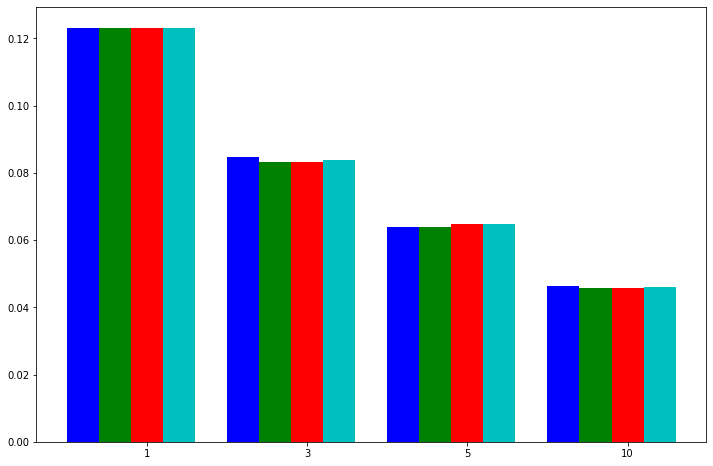

In [232]:
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
x = np.arange(len(precision_x))

ax.bar(x, precision_xy[0], width=bar_width, color='b', align='center')
ax.bar(x+bar_width, precision_xy[1], width=bar_width, color='g', align='center')
ax.bar(x+bar_width*2, precision_xy[2], width=bar_width, color='r', align='center')
ax.bar(x+bar_width*3, precision_xy[3], width=bar_width, color='c', align='center')
ax.bar(x+bar_width*3, precision_xy[4], width=bar_width, color='c', align='center')

ax.set_xticks(x + bar_width*2)
ax.set_xticklabels(precision_x)


## Ranking Factorization

In [14]:
implicit_ranking_factorization_model = tc.recommender.ranking_factorization_recommender.create(to_read_train, user_id='user_id', item_id=books_with_tags[['book_id','tag_name']])
implicit_ranking_factorization_model.evaluate_precision_recall(to_read_test, exclude_known=True, verbose=False)

ValueError: Expecting a flexible_type. Got a Dictionary

In [15]:
books_with_tags[['book_id','tag_name']]

book_id,tag_name
1,fantasy young adultfiction adventure sci fi ...
2,fantasy young adultfiction harry potter ...
3,fantasy young adultfiction sci fi fantasy ...
4,young adult fictionchildhood classics ...
5,young adult fictionclassics english books ...
6,young adult fiction teenenglish books young a ...
7,fantasy young adultfiction magic childrens ...
8,young adult fictionclassics teen english ...
9,fantasy fiction adventureclassics english books ...
10,young adult fictionclassics english british ...


In [ ]:
tc.recommender.util.compare_models(test_data, 
                                   [popularity_model, item_similarity_model], 
                                   model_names=["Popularity", "Explicit Item Simularity"],
                                  metric='precision_recall',
                                   exclude_known_for_precision_recall=True,
                                  verbose=False)

# Content Model

In [ ]:
rmse_x = []#,'similarity','similarity_clustered_books','tags_cv_svd','tags_tfid_svd','genre_clusters']
rmse_y = []
precision_y = [[], [], [], []] # cutoffs: 1, 3, 5, 10
cutoffs = [0,2,4,9]
precision_x = [1, 3, 5, 10]
precision_xy = []

In [ ]:
item_content_recommender_model = tc.recommender.item_content_recommender.create(books_with_tags[['book_id','tag_name']],
                                               item_id='book_id',
                                              observation_data=actions,
                                              user_id='user_id',
                                              target='rating',
                                                verbose=False)

In [ ]:
item_content_recommender_eval = item_content_recommender_model.evaluate_rmse(test_data, target='rating')
rmse_x.append('content')
rmse_y.append(factorization_svd_tfid_eval['rmse_overall'])


In [ ]:
item_content_recommender_model_svd = tc.recommender.item_content_recommender.create(svd_tags, 
                                               item_id='book_id',
                                              observation_data=actions,
                                              user_id='user_id',
                                              target='rating',
                                                verbose=False)

In [ ]:
item_content_recommender_svd_eval = item_content_recommender_model_svd.evaluate_rmse(test_data, target='rating')
rmse_x.append('content_svd')
rmse_y.append(item_content_recommender_svd_eval['rmse_overall'])


In [ ]:
item_content_recommender_model_svd_tfid = tc.recommender.item_content_recommender.create(svd_tfid_tags, 
                                               item_id='book_id',
                                              observation_data=actions,
                                              user_id='user_id',
                                              target='rating',
                                                verbose=False)

In [ ]:
item_content_recommender_svd_tfid_eval = item_content_recommender_model_svd_tfid.evaluate_rmse(test_data, target='rating')
rmse_x.append('content_svd_tfid')
rmse_y.append(item_content_recommender_svd_tfid_eval['rmse_overall'])


In [ ]:
item_content_recommender_model_genre_clusters = tc.recommender.item_content_recommender.create(book_genre_clusters, 
                                               item_id='book_id',
                                              observation_data=actions,
                                              user_id='user_id',
                                              target='rating',
                                                verbose=False)


In [ ]:
item_content_recommender_genre_clusters_eval = item_content_recommender_model_genre_clusters.evaluate_rmse(test_data, target='rating')
rmse_x.append('content_genre_clusters')
rmse_y.append(item_content_recommender_genre_clusters_eval['rmse_overall'])


In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))


bar_width = 0.2
x = np.arange(len(rmse_x))

ax.bar(x, precision_y[0], width=bar_width, color='b', align='center')
ax.bar(x+bar_width, precision_y[1], width=bar_width, color='g', align='center')
ax.bar(x+bar_width*2, precision_y[2], width=bar_width, color='r', align='center')
ax.bar(x+bar_width*3, precision_y[3], width=bar_width, color='c', align='center')

ax.set_xticks(x + bar_width*2)
ax.set_xticklabels(rmse_x)
